In [ ]:
!pip install langdetect

     |████████████████████████████████| 981 kB 5.4 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=da349dcdfe19376003b109a9b7c6d4182ecf7c4a4ad86bdf14e1c11a77b5819f
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
!pip install better_profanity

     |████████████████████████████████| 46 kB 2.0 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import os
import langdetect

import nltk
from nltk.tokenize import TweetTokenizer
import re
import string
from better_profanity import profanity
import seaborn as sn
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Ensemble/Project/data/cyberbullying_tweets.csv")

In [ ]:
df.groupby("cyberbullying_type").count()

,tweet_text
cyberbullying_type,
age,7992
ethnicity,7961
gender,7973
not_cyberbullying,7945
other_cyberbullying,7823
religion,7998


### Base Processing
In this section, we aim to clean our tweets (removing stopwords and Lemmatizing) and build simple features (count of hashtags, mentions and profanity words).

In [ ]:
lst_stopwords = nltk.corpus.stopwords.words("english")

In [ ]:
# Deal with swear-words/profanity
with open("/content/drive/MyDrive/Ensemble/Project/data/bad-words.txt","r") as f:
    profanity_lst = f.read().splitlines()

In [ ]:
# Preprocessing tweets
def preprocess_tweets(text, stemm=False, lemm=True, lst_stopwords=None):

    # Lowercase, remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())

    # Split text by space
    text_lst = text.split()

    # Remove stop-words
    if lst_stopwords is not None:
        text_lst = [word for word in text_lst if word not in lst_stopwords]

    # Stemming
    if stemm:
        ps = nltk.stem.porter.PorterStemmer()
        text_lst = [ps.stem(word) for word in text_lst]

    # Lemmatisation
    if lemm:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        text_lst = [lem.lemmatize(word) for word in text_lst]

    text = " ".join(text_lst)
    return text

In [ ]:
df["clean_tweet"] = df["tweet_text"].apply(lambda x: preprocess_tweets(x, lst_stopwords=lst_stopwords))

In [ ]:
df["nb_hashtags"] = df["tweet_text"].apply(lambda x: len(re.findall("#", x)))

In [ ]:
df["nb_atts"] = df["tweet_text"].apply(lambda x: len(re.findall("@", x)))

In [ ]:
df["is_rt"] = df["tweet_text"].apply(lambda x: len(re.findall("RT", x)))

In [ ]:
df["tweet_length"] = df["tweet_text"].apply(lambda x: len(x))

In [ ]:
# Count profanity words
def profanity_count(text, profanity_lst):
    text_lst = text.split() # split text on spaces
    profanity_cnt = 0
    for word in text_lst:
        if word in profanity_lst:
            profanity_cnt += 1
    return profanity_cnt

In [ ]:
df["profanity_cnt"] = df["clean_tweet"].apply(lambda x: profanity_count(x, profanity_lst))

In [ ]:
df

,tweet_text,cyberbullying_type,clean_tweet,nb_hashtags,nb_atts,is_rt,tweet_length,profanity_cnt
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandre food crapilicious mkr,2,0,0,61,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...,10,0,0,115,0
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,xochitlsuckkks classy whore red velvet cupcake,0,1,0,60,1
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,jason_gio meh p thanks head concerned another ...,0,1,0,103,1
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,rudhoeenglish isi account pretending kurdish a...,0,1,0,103,0
...,...,...,...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black ppl arent expected anything depended any...,0,0,0,234,1
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner withhold disappointment turner called c...,0,0,0,276,3
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,swear god dumb nigger bitch got bleach hair re...,0,0,0,104,6
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck rt therealexel youre nigger fucking u...,0,1,1,90,6


### TF-IDF Vectorization
In this section, we vectorize our clean tweets by computing their TF-IDF matrices.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Train TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=100) # Only consider top 10000 frequency words
vectorizer.fit(df["clean_tweet"])

print(len(vectorizer.vocabulary_))
print(vectorizer.vocabulary_)

100
{'word': 96, 'mkr': 56, 'white': 94, 'like': 47, 'islam': 40, 'good': 33, 'bad': 5, 'bully': 9, 'black': 7, 'school': 75, 'bullying': 10, 'rt': 72, 'year': 98, 'love': 50, 'youre': 99, 'people': 65, 'call': 11, 'hate': 36, 'know': 44, 'girl': 30, 'kid': 43, 'still': 80, 'men': 55, 'one': 64, 'going': 32, 'need': 60, 'really': 70, 'want': 92, 'get': 29, 'cant': 13, 'doesnt': 17, 'lol': 48, 'dont': 18, 'first': 23, 'time': 90, 'thing': 88, 'even': 20, 'sexist': 77, 'would': 97, 'think': 89, 'go': 31, 'look': 49, 'see': 76, 'fuck': 25, 'let': 45, 'mean': 54, 'amp': 1, 'woman': 95, 'im': 39, 'shit': 78, 'funny': 27, 'gay': 28, 'fucking': 26, 'back': 4, 'day': 15, 'as': 3, 'every': 21, 'stop': 81, 'much': 57, 'muslim': 58, 'someone': 79, 'idiot': 38, 'christian': 14, 'support': 82, 'never': 61, 'name': 59, 'thats': 87, 'didnt': 16, 'also': 0, 'say': 74, 'bullied': 8, 'take': 83, 'got': 34, 'make': 52, 'guy': 35, 'life': 46, 'made': 51, 'said': 73, 'way': 93, 'friend': 24, 'right': 71, '

In [ ]:
tfidf_matrix = vectorizer.transform(df["clean_tweet"]).toarray()

In [ ]:
df[list(vectorizer.vocabulary_.keys())] = tfidf_matrix

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)


In [ ]:
df

,tweet_text,cyberbullying_type,clean_tweet,nb_hashtags,nb_atts,is_rt,tweet_length,profanity_cnt,word,mkr,white,like,islam,good,bad,bully,black,school,bullying,rt,year,love,youre,people,call,hate,know,girl,kid,still,men,one,going,need,really,want,get,cant,doesnt,lol,...,someone,idiot,christian,support,never,name,thats,didnt,also,say,bullied,take,got,make,guy,life,made,said,way,friend,right,bitch,man,islamic,racist,high,ur,terrorist,dumb,female,joke,racism,anything,called,terrorism,radical,rape,obama,nigger,tayyoung_
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandre food crapilicious mkr,2,0,0,61,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.785758,0.0,0.0,0.000000
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...,10,0,0,115,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.725564,0.000000,0.000000,0.0,0.0,0.000000
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,xochitlsuckkks classy whore red velvet cupcake,0,1,0,60,1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,jason_gio meh p thanks head concerned another ...,0,1,0,103,1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,rudhoeenglish isi account pretending kurdish a...,0,1,0,103,0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black ppl arent expected anything depended any...,0,0,0,234,1,0.0,0.0,0.920371,0.0,0.0,0.0,0.000000,0.391047,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner withhold disappointment turner called c...,0,0,0,276,3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.477911,0

### Binary Model
In this section, we build a first model aiming to classify tweets between cyberbullying and not, regardless of the bullying category.

In [ ]:
# First build binary target column
def is_bullying(text):
    if text == "not_cyberbullying": return 1
    else: return 0

df["is_cyberbullying"] = df["cyberbullying_type"].apply(lambda x: is_bullying(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


We can now build our models:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [ ]:
df.columns

Index(['tweet_text', 'cyberbullying_type', 'clean_tweet', 'nb_hashtags',
       'nb_atts', 'is_rt', 'tweet_length', 'profanity_cnt', 'word', 'mkr',
       ...
       'racism', 'anything', 'called', 'terrorism', 'radical', 'rape', 'obama',
       'nigger', 'tayyoung_', 'is_cyberbullying'],
      dtype='object', length=109)

In [ ]:
# Split data in training and test set
features = ["nb_hashtags","nb_atts","is_rt","tweet_length","profanity_cnt"] + list(vectorizer.vocabulary_.keys())
target = "is_cyberbullying"

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [ ]:
# Build classifier and fit
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Compute prediction score
print("Mean Accuracy:", rf.score(X_test, y_test))

Mean Accuracy: 0.829541880700283


In [ ]:
# Compute F1-score
y_test_pred = rf.predict(X_test)
print("F1-score:", f1_score(y_test, y_test_pred))

F1-score: 0.43814789219073946


In [ ]:
# Predict on test data
y_test_pred = rf.predict(X_test)

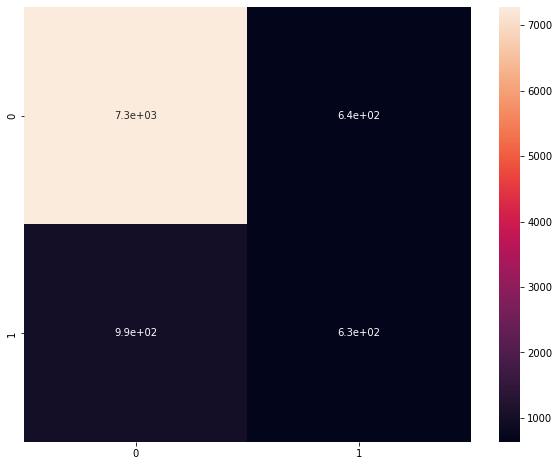

In [ ]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10,8))
sn.heatmap(conf_matrix, annot=True)
plt.show()

### Multi-Class Model
In this section, we predict the type of cyberbullying associated to each tweet.

In [ ]:
df["cyberbullying_type"].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [ ]:
# First build multi-class target column
def bullying_type(text):
    if text == "not_cyberbullying": return 0
    elif text == "gender": return 1
    elif text == "religion": return 2
    elif text == "other_cyberbullying": return 3
    elif text == "age": return 4
    else: return 5

df["cyberbullying_type_encode"] = df["cyberbullying_type"].apply(lambda x: bullying_type(x))

In [ ]:
# Split data in training and test set
features = ["nb_hashtags","nb_atts","is_rt","tweet_length","profanity_cnt"] + list(vectorizer.vocabulary_.keys())
target = "cyberbullying_type_encode"

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [ ]:
# Build classifier and fit
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Compute prediction score
print("Mean Accuracy:", rf.score(X_test, y_test))

Mean Accuracy: 0.7780689799769368


In [ ]:
# Predict on test data
y_test_pred = rf.predict(X_test)

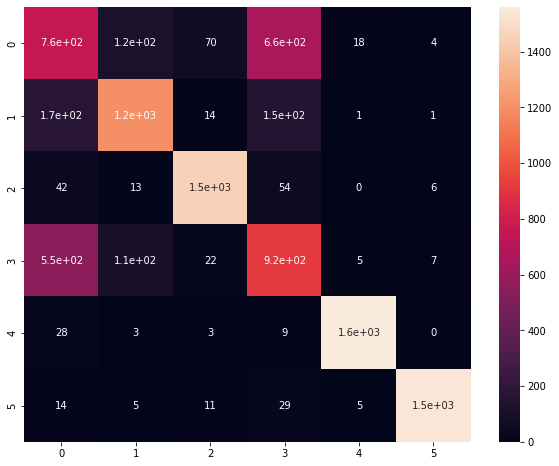

In [ ]:
# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10,8))
sn.heatmap(conf_matrix, annot=True)
plt.show()

### Catboost

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 70 kB/s 


In [ ]:
import catboost as cb

In [ ]:
# Split data in training and test set
features = ["nb_hashtags","nb_atts","is_rt","tweet_length","profanity_cnt"] + list(vectorizer.vocabulary_.keys())
target = "cyberbullying_type"

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [ ]:
# Instantiate and classify
cb_classifier = cb.CatBoostClassifier()
cb_classifier.fit(X_train, y_train)

Learning rate set to 0.095275
0:	learn: 1.5694493	total: 322ms	remaining: 5m 21s
1:	learn: 1.4284748	total: 704ms	remaining: 5m 51s
2:	learn: 1.3233662	total: 953ms	remaining: 5m 16s
3:	learn: 1.2403113	total: 1.19s	remaining: 4m 56s
4:	learn: 1.1704947	total: 1.52s	remaining: 5m 2s
5:	learn: 1.1132953	total: 1.74s	remaining: 4m 48s
6:	learn: 1.0636910	total: 1.96s	remaining: 4m 38s
7:	learn: 1.0246711	total: 2.17s	remaining: 4m 28s
8:	learn: 0.9872204	total: 2.37s	remaining: 4m 21s
9:	learn: 0.9552725	total: 2.62s	remaining: 4m 18s
10:	learn: 0.9236553	total: 2.99s	remaining: 4m 28s
11:	learn: 0.8972174	total: 3.35s	remaining: 4m 36s
12:	learn: 0.8721871	total: 3.69s	remaining: 4m 39s
13:	learn: 0.8492135	total: 4.04s	remaining: 4m 44s
14:	learn: 0.8293888	total: 4.46s	remaining: 4m 52s
15:	learn: 0.8076674	total: 4.89s	remaining: 5m
16:	learn: 0.7930666	total: 5.28s	remaining: 5m 5s
17:	learn: 0.7792835	total: 5.63s	remaining: 5m 7s
18:	learn: 0.7651722	total: 6.03s	remaining: 5m 11s

In [ ]:
# Compute accuracy score
y_test_pred = cb_classifier.predict(X_test)
print("Accuracy Score:",accuracy_score(y_test, y_test_pred))

Accuracy Score: 0.807946325610651


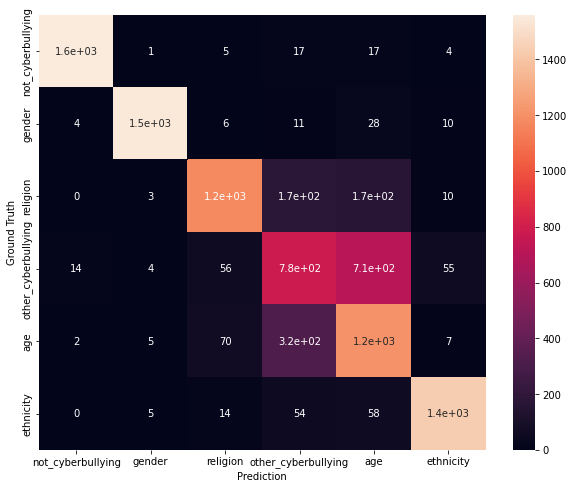

In [ ]:
# Print confusion matrix
categories = ["not_cyberbullying", "gender", "religion", "other_cyberbullying", "age", "ethnicity"]

conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10,8))
sn.heatmap(conf_matrix, annot=True, xticklabels=categories, yticklabels=categories)
plt.ylabel("Ground Truth")
plt.xlabel("Prediction")
plt.show()